# ***Guide to train basic CNN model on fashion MNIST***

This Notebook provides the comprehensive guide to train the basic Convolution Neural Network on Fashion MNIST dataset. The Library used in the given task is 'Keras' that provides the necessary components to create a basic CNN architecture and other required components.

The following is the workflow diagram to train basic CNN model that highlights all necessary steps.

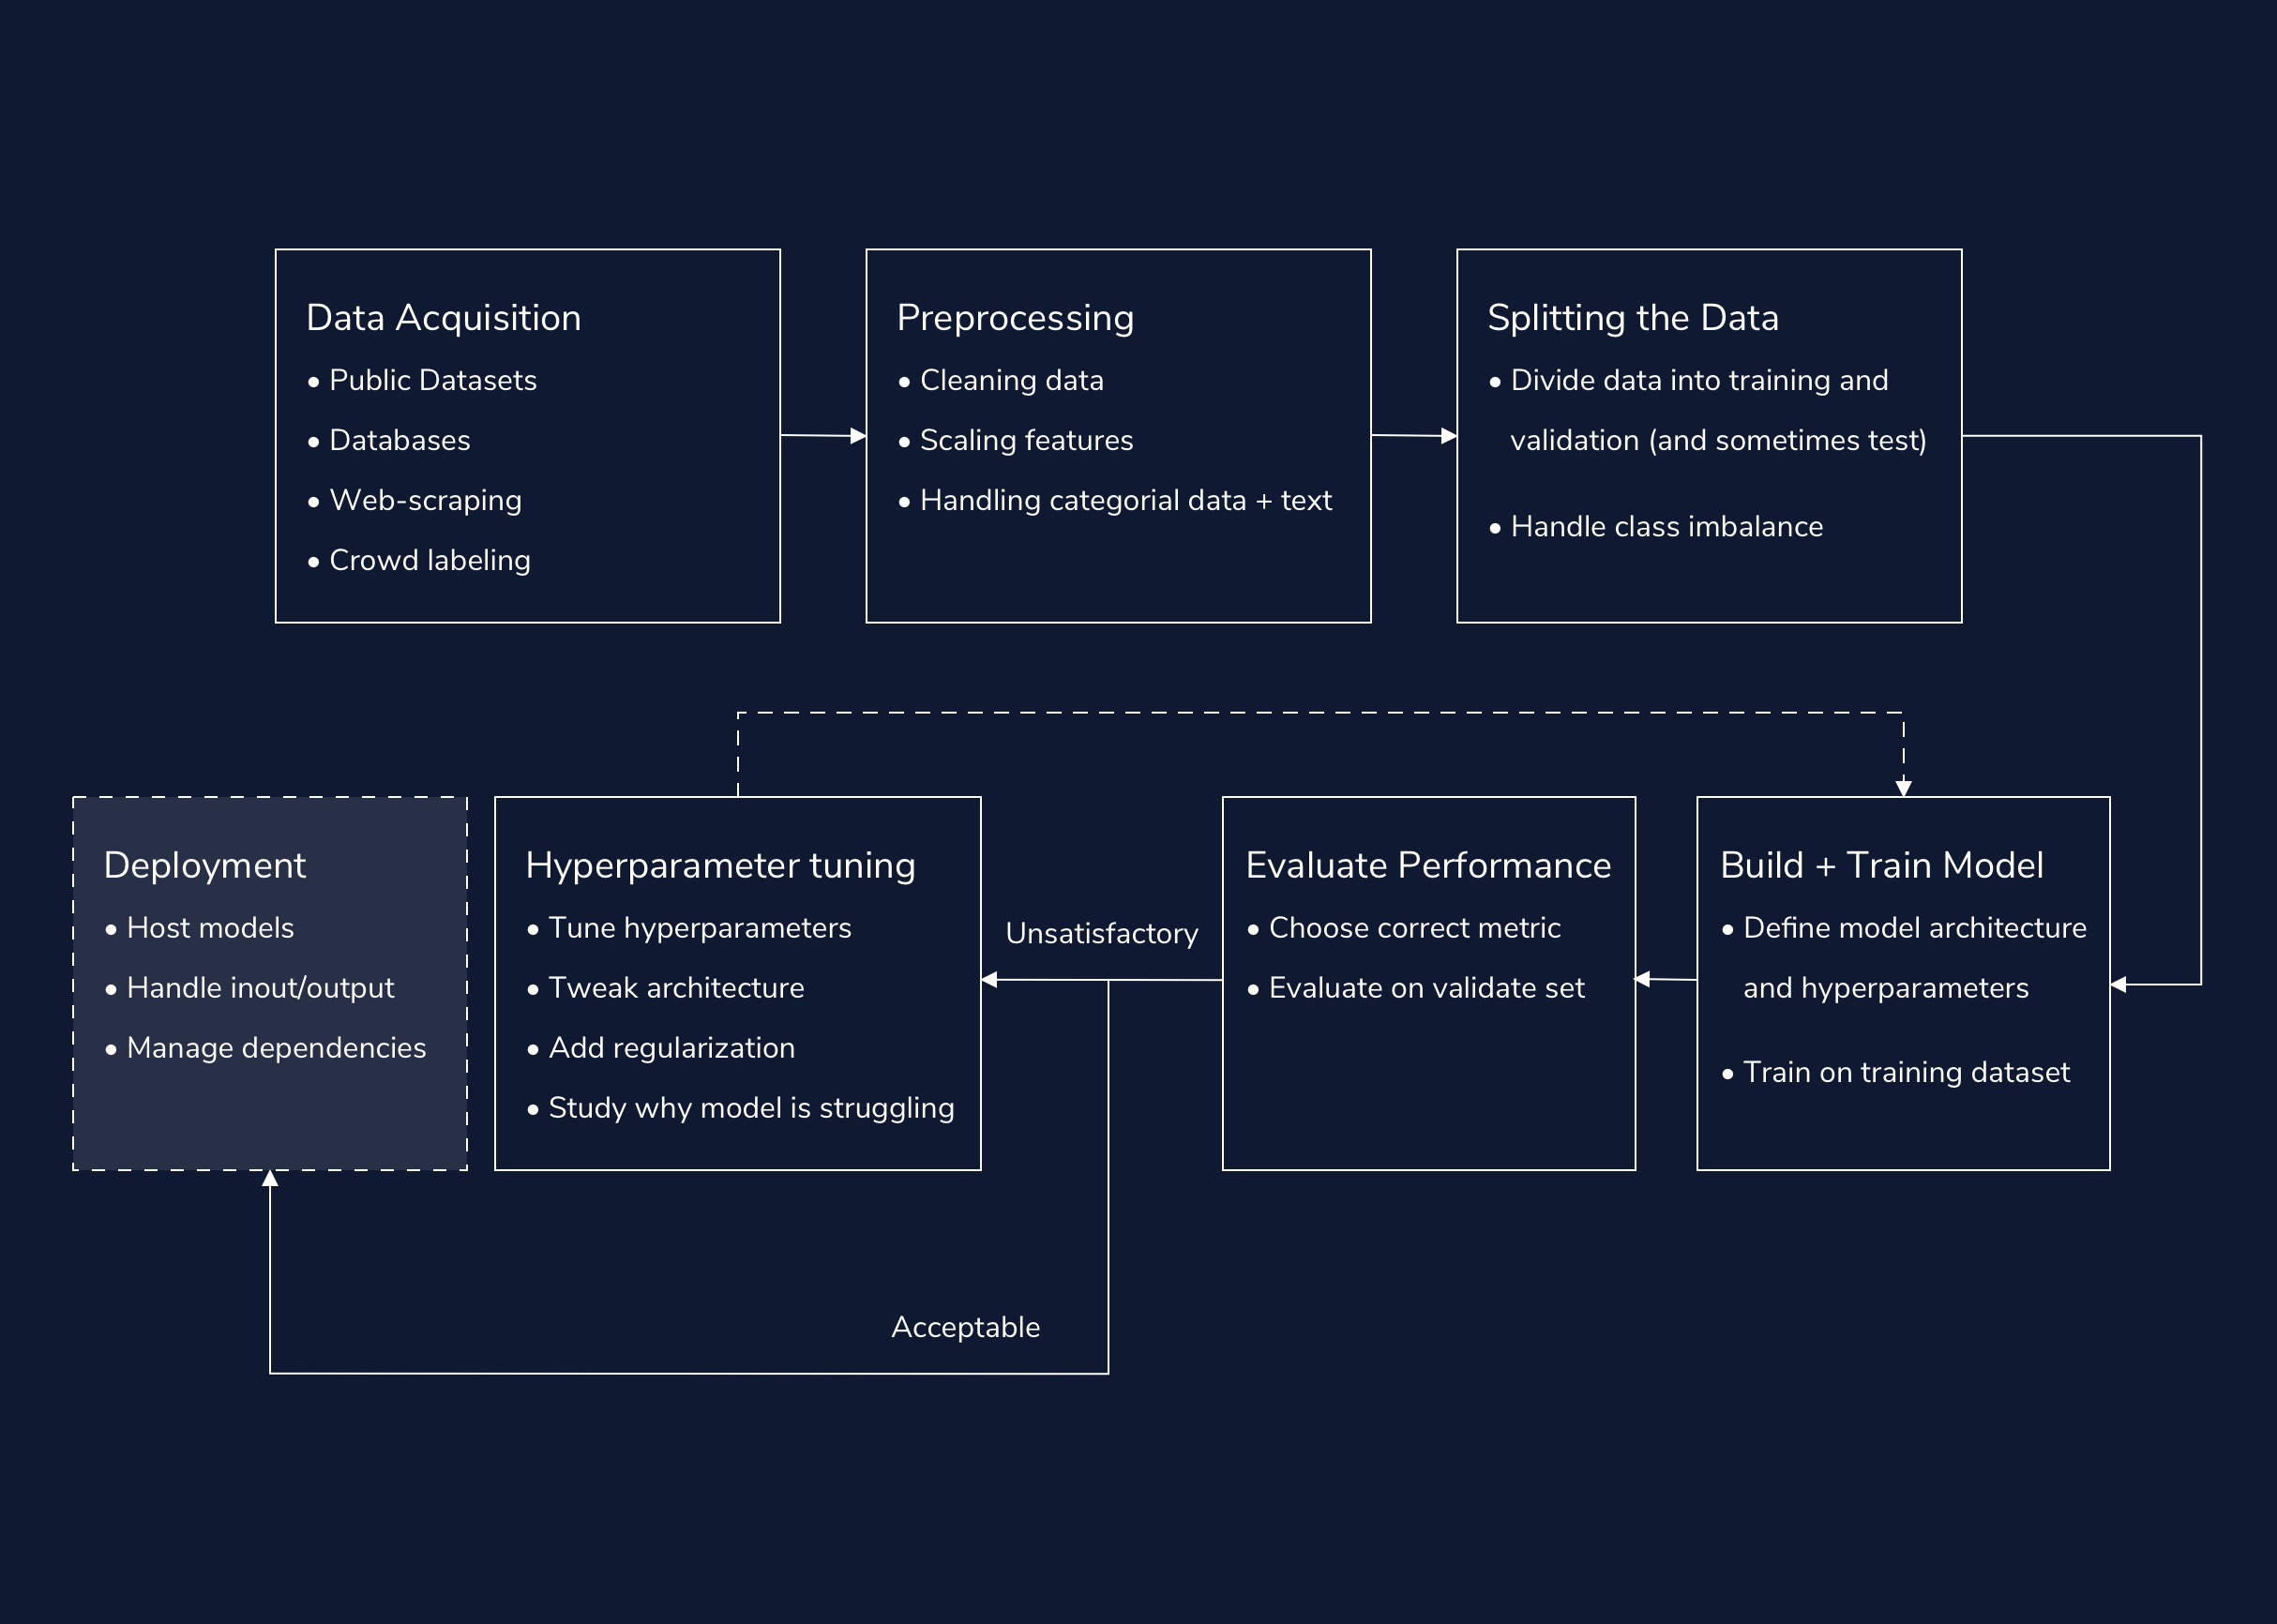

## ***Training a basic Convolutional Neural Network (CNN) involves several steps. Here's a concise guide to train a basic CNN model:***

### 1. ***Prepare your dataset:***

Obtain a dataset suitable for your task (e.g., image classification, object detection).
Split the dataset into training, validation, and test sets.

### 2. ***Import necessary libraries:***

Use libraries like TensorFlow or PyTorch for building and training your CNN.
Import other libraries like NumPy for numerical operations and Matplotlib for visualization.

### 3. ***Build your CNN model:***

Define the architecture of your CNN using layers such as convolutional layers, pooling layers, and fully connected layers.
Choose appropriate activation functions like ReLU for hidden layers.
Design the output layer based on your task (e.g., softmax for classification).

### 4. ***Compile your model:***

Specify the loss function (e.g., categorical cross-entropy for classification).
Choose an optimizer (e.g., Adam, SGD) and set its parameters (e.g., learning rate).
Specify metrics to evaluate model performance during training (e.g., accuracy).

### 5. ***Preprocess your data:***

Normalize your input data (e.g., scale pixel values to [0, 1]).
Augment your data if necessary (e.g., rotation, flipping) to increase model generalization.

### 6. ***Train your model:***

Use the training set to fit your model to the data.
Specify the number of epochs (complete passes through the dataset) for training.
Monitor the performance on the validation set to avoid overfitting.
Adjust the model architecture or hyperparameters based on validation performance if necessary.

### 7. ***Evaluate your model:***

After training, evaluate your model's performance on the test set.
Calculate metrics such as accuracy, precision, recall, and F1-score depending on your task.
Visualize performance metrics and model predictions for further analysis.

### 8. ***Fine-tune your model (optional):***

If your model performance is not satisfactory, consider fine-tuning by adjusting hyperparameters or adding regularization techniques.
Experiment with different architectures or pre-trained models to improve performance.

### 9. ***Deploy your model (optional):***

Once satisfied with your model's performance, deploy it in your desired application environment.
Ensure the deployment environment supports the required libraries and dependencies for running the model.

### 10. ***Monitor and maintain your model (optional):***

Continuously monitor your model's performance in the deployment environment.
Retrain or update the model periodically to adapt to changing data distributions or requirements.
By following these steps, you can train a basic CNN model for various tasks efficiently.

---

### ***1. Prepare your dataset:***

The Dataset used for this guide is **fashion MNIST**.

The Fashion MNIST dataset is a collection of grayscale images commonly used as a benchmark in machine learning and computer vision tasks. It serves as a more challenging alternative to the traditional MNIST dataset, providing a broader range of clothing items for classification.

Containing ***60,000*** training images and ***10,000*** test images, each image is a ***28x28***-pixel grayscale representation of various fashion items, including shirts, trousers, dresses, shoes, and more. The dataset consists of ***10*** classes in total, with each class representing a specific type of clothing item.

Fashion MNIST is widely used for tasks such as image classification, deep learning model evaluation, and algorithm prototyping. It provides a convenient and standardized dataset for researchers and practitioners to assess the performance of their machine learning models in the context of fashion-related tasks. Below are the samples of MNIST dataset

<br>
<center>
<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>
</center>

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

print(tf.__version__)

2.15.0


In [2]:
# keras offers direct access to the fashion mnist dataset. Let's import it
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 1s 0us/step


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<br>
<center>
<table>
  <tr>
    <th>Label</th>
    <td>0</td>
    <td>1</td>
    <td>2</td>
    <td>3</td>
    <td>4</td>
    <td>5</td>
    <td>6</td>
    <td>7</td>
    <td>8</td>
    <td>9</td>
  </tr>
  <tr>
    <th>Class</th>
    <td>T-shirt/top</td>
    <td>Trouser</td>
    <td>Pullover</td>
    <td>Dress</td>
    <td>Coat</td>
    <td>Sandal</td>
    <td>Shirt</td>
    <td>Sneaker</td>
    <td>Bag</td>
    <td>Ankle boot</td>
  </tr>
</table>
</center>
<br>


Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**Exploratory Dataset Analysis (EDA)**

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [4]:
print("training set shape = ", train_images.shape)
print("validation set shape = ", test_images.shape)
print("training labels = ", len(train_labels))
print("validation labels = ", len(test_labels))

training set shape =  (60000, 28, 28)
validation set shape =  (10000, 28, 28)
training labels =  60000
validation labels =  10000


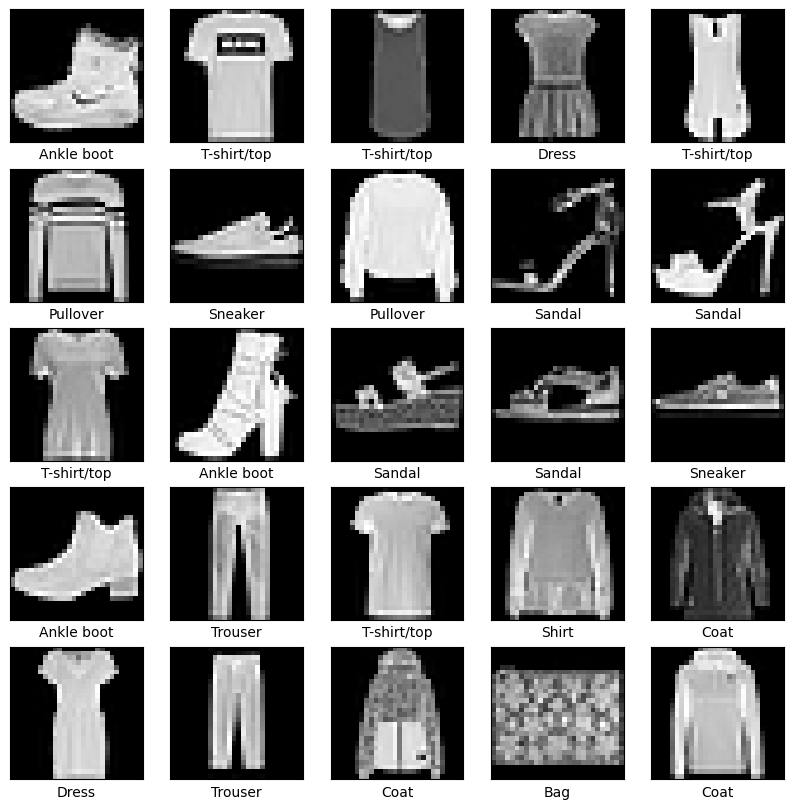

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap="gray")
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### 2. ***Preprocessing***

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

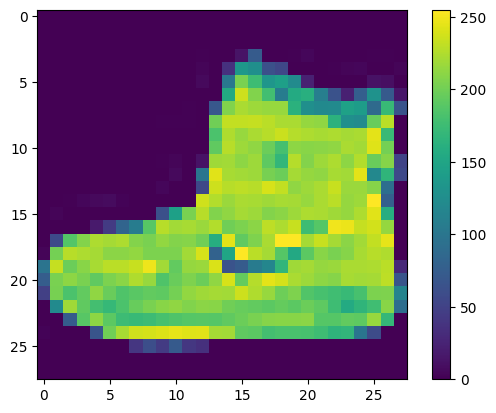

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

### ***Normalization***
***Normalizing images between 0 and 1 range by dividing every image by 255.***

In [7]:
# Scale values to be between 0 and 1

normalize_train_images = train_images / 255.0

normalize_test_images = test_images / 255.0

Maximum pixel value =  1.0
Minimum pixel value =  0.0
Mean =  0.2860405969887955
Std =  0.35302424451492237


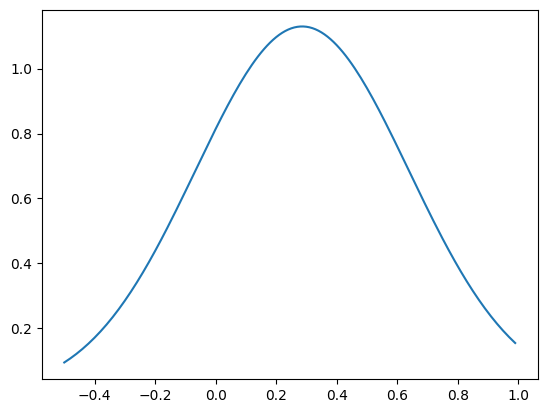

In [8]:
print('Maximum pixel value = ',np.max(normalize_train_images))
print('Minimum pixel value = ',np.min(normalize_train_images))

print('Mean = ',np.mean(normalize_train_images))
print('Std = ',np.std(normalize_train_images))

mean = np.mean(normalize_train_images)
std = np.std(normalize_train_images)
plt.plot(np.arange(-0.5, 1, 0.01),norm.pdf(np.arange(-0.5, 1, 0.01) , mean, std))
plt.show()

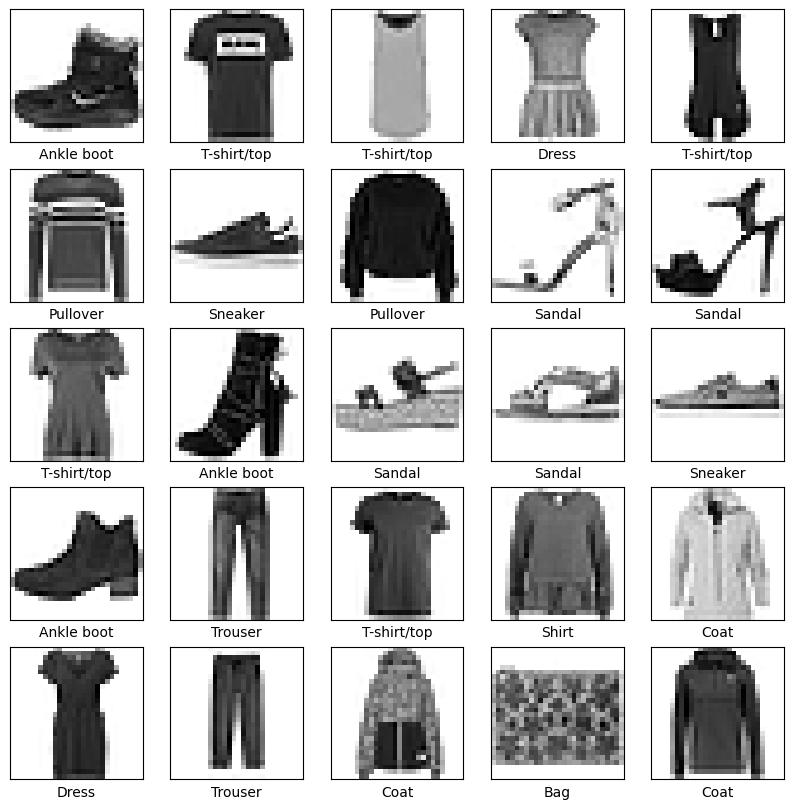

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### **Labels one hot encoding**

`One hot encoding` is a technique used to represent categorical variables as binary vectors. In this encoding, each category is represented by a vector where all elements are zero except for one, which corresponds to the category index. This representation is commonly used in machine learning tasks where categorical variables need to be converted into a format suitable for mathematical operations, such as training neural networks.

<br>
<center>
<table>
  <tr><td>
    <img src="https://miro.medium.com/v2/resize:fit:837/1*d5-PQyRRjvzBZjI5f7X3hA.png"
         alt="Fashion MNIST sprite"  width="430">
  </td></tr>
  <tr><td align="center">
    <b>Figure 2.</b> one hot encoding<br/>&nbsp;
  </td></tr>
</table>
</center>

In [10]:
from keras.utils import to_categorical
import random

In [11]:
encoded_train_labels = to_categorical(train_labels)
encoded_test_labels = to_categorical(test_labels)

In [13]:
sample_number = random.randint(0,60000-1)
print(encoded_train_labels.shape)

print()
print(train_labels[sample_number] , " ==> ", encoded_train_labels[sample_number])

(60000, 10)

6  ==>  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


### ***Dataset Augmentation (optional)***
Dataset augmentation is a technique used in machine learning and computer vision to artificially increase the size of a dataset by applying various transformations to the existing data samples. These transformations can include rotations, translations, flips, changes in brightness and contrast, cropping, and more. Augmentation helps improve the generalization and robustness of machine learning models by exposing them to a wider variety of data without collecting new samples.

### 3. ***Creating custom CNN Architecture:***

<br>
<center>
<table>
  <tr><td>
    <img src="https://www.researchgate.net/publication/336805909/figure/fig1/AS:817888827023360@1572011300751/Schematic-diagram-of-a-basic-convolutional-neural-network-CNN-architecture-26.ppm"
         alt="Fashion MNIST sprite"  width="430">
  </td></tr>
  <tr><td align="center">
    <b>Figure 2.</b> CNN Architecture Diagram<br/>&nbsp;
  </td></tr>
</table>
</center>

### ***import important components***

There are two methods of creating any neural network architecture using Keras library/API.

1.   Sequential API(Basic one, We will use this)
2.   Functional API (For Creating More Flexible Architecture)

In [14]:
from keras.models import Model, Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Activation, Dropout, Dense, Flatten
from keras.utils import plot_model

Let's create basic custom Convolution Neural Network. Our input is an 28 * 28 pixel image.

In [15]:
input_layer = Input((28, 28, 1))

**2nd layer is Convolution layer**

 `Conv2D` is a 2-dimensional convolutional layer in the Keras library, specifically designed for Convolutional Neural Networks (CNNs). It performs convolution operations on 2D input data, such as images, using a set of learnable filters. These filters slide over the input data, extracting features and creating feature maps. The layer parameters include the number of filters, filter size, padding, and activation function, allowing for flexibility in network architecture design.

In [16]:
layer_1 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
                 kernel_initializer='he_uniform', input_shape=(28, 28, 1))

`Parameters`

**1. Filters:** Integer, the dimensionality of the output space (i.e., the number of filters in the convolution).

**2. kernel_size:** An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window.

**3. activation:** Activation function to apply. Typically, choices include "relu", "sigmoid", "tanh", etc.

**4. input_shape:** Only required when using this layer as the first layer in a model. It specifies the shape of the input data.

**5. kernel_initializer:** Initializer for the kernel weights matrix.

**3rd layer is maxpooling**

`MaxPooling2D` is a pooling layer in the Keras library used in Convolutional Neural Networks (CNNs). It operates on 2D input data, typically feature maps generated by convolutional layers. Max pooling reduces the spatial dimensions of the input by taking the maximum value within each window of a defined size. This downsampling operation helps in reducing computational complexity, extracting dominant features, and increasing translation invariance in the network.

In [17]:
layer_2 = MaxPooling2D(pool_size=(2, 2))

`Parameters`

**1. pool_size:** An integer or tuple/list of 2 integers representing the size of the pooling window. For example, pool_size=(2, 2) means a 2x2 window will be used for pooling.

**Next Layer is Flatten layer**

Flatten, transforms the format of the images from a two-dimensional array to a one-dimensional array. Think of this layer as unstacking rows of pixels in the image/feature map and lining them up. This layer has no parameters to learn; it only reformats the data.

In [18]:
flatten_layer = Flatten()

**The 4th layer is a fully-connected layer**, or dense layer. This layer has learning parameters, including weights and biases. It has 100 neurons. This layer learns by adjusting these weights and biases through the training process. The big advantage here is that this learning is done automatically by the framework; we just need to direct it, as we will see next.

In [19]:
layer_4 = Dense(100, activation='relu', kernel_initializer='he_uniform')

The **5th layer** (output layer) is another fully connected layer with 10 neurons. It serves as the output layer of the network. it uses the softmax layer that creates the probablity distribution across the 10 output units.

<br>
<center>
<table>
  <tr><td>
    <img src="https://miro.medium.com/v2/resize:fit:1400/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg"
         alt="Fashion MNIST sprite"  width="330">
  </td></tr>
  <tr><td align="center">
    <b>Figure 3.</b> Softmax Activation Function<br/>&nbsp;
  </td></tr>
</table>
</center>

In [20]:
layer_5 = Dense(10, activation='softmax')

Now all necessary components (layers) are created, its time to create basic CNN architecture using these layers. For the demonstration of this basic guide notebook, the sequential API is used.

The `tf.keras.Sequential` is the fundamental neural network model type in Keras. As the name implies, it stacks layers together as you're probably imagining it in your mind now.


In [21]:
model = Sequential([
    input_layer,
    layer_1,
    layer_2,
    flatten_layer,
    layer_4,
    layer_5
])

**Architecture Detail**

In [22]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

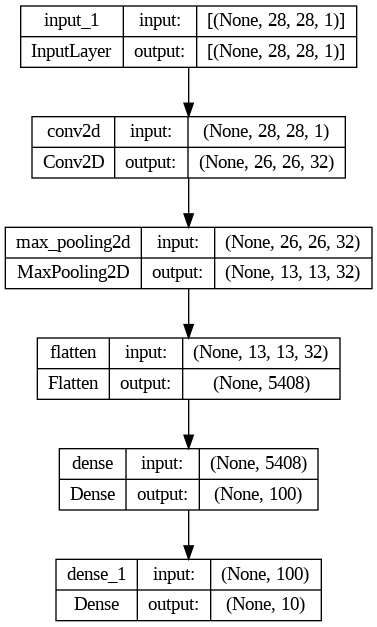

In [23]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### 4. **Compile model**

This step is where you compile the model, specifying several key components that define how the model learns from the data.
This method configures the model for training. It sets up the **optimizer**, the **loss** function, and any **metrics** that you want to observe during training. Here's what each argument means:


`optimizer='adam'`: The optimizer is responsible for adjusting the weights of the network based on the gradient of the loss function. adam is a popular choice because it combines the best properties of the AdaGrad and RMSProp algorithms to handle sparse gradients on noisy problems. Adam is known for its efficiency in terms of both computation and memory, and it adjusts the learning rate during training.

`loss='categorical_crossentropy'`: This specifies the loss function to use for training the model. The loss function measures how well the model's predictions match the target labels. `CategoricalCrossentropy` is used for multi-class classification problems where the targets are one hot encoded values.

`metrics=['accuracy']`: This argument specifies the list of metrics to be evaluated by the model during training and testing. Here, accuracy is used, which is a common metric for classification problems. Accuracy measures the fraction of correctly classified instances among the total number of instances.



In [24]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### 5. **Train your model:**

To start training, call the model.fit method—so called because it "fits" the model to the training data. As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data over 10 epochs.

In [25]:
history = model.fit(normalize_train_images, encoded_train_labels,
          validation_data=(normalize_test_images,encoded_test_labels),
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 43s 22ms/step - loss: 0.4068 - accuracy: 0.8572 - val_loss: 0.3245 - val_accuracy: 0.8871
Epoch 2/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2699 - accuracy: 0.9025 - val_loss: 0.2853 - val_accuracy: 0.8981
Epoch 3/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2264 - accuracy: 0.9181 - val_loss: 0.2703 - val_accuracy: 0.9029
Epoch 4/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1961 - accuracy: 0.9276 - val_loss: 0.2777 - val_accuracy: 0.9009
Epoch 5/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1710 - accuracy: 0.9375 - val_loss: 0.2649 - val_accuracy: 0.9109
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1466 - accuracy: 0.9466 - val_loss: 0.2849 - val_accuracy: 0.9073
Epoch 7/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1286 - accuracy: 0.9531 - val_loss: 0.2869 -

### 6. **Evaluate trained model**

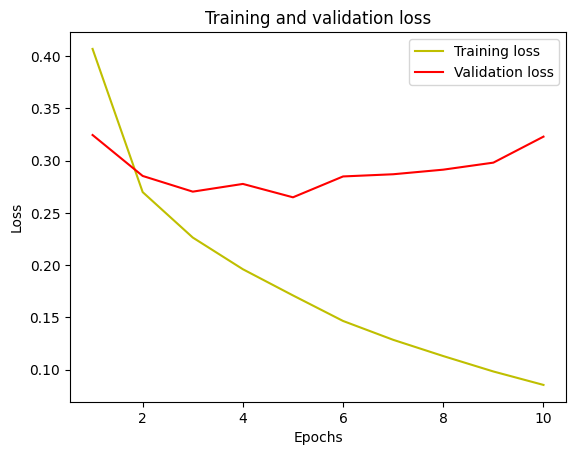

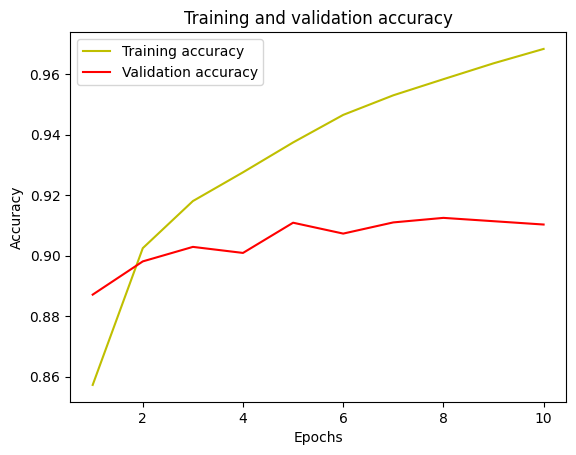

In [27]:
##################################################################


#plot the training and validation IoU and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#################################################

In [28]:
# display model accuracy
test_loss, test_acc = model.evaluate(normalize_test_images,  encoded_test_labels, verbose=2)

print('\nValidation set accuracy:', test_acc)

313/313 - 2s - loss: 0.3229 - accuracy: 0.9103 - 2s/epoch - 6ms/step

Validation set accuracy: 0.9103000164031982


### **Generating Prediction from random testing samples**

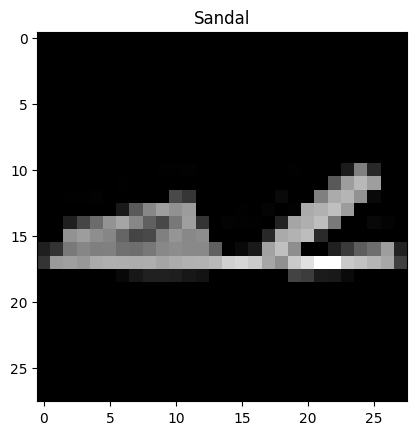

In [58]:
sample_number = random.randint(0,10000-1)
sample = normalize_test_images[sample_number]

plt.title(label= class_names[np.argmax(encoded_test_labels[sample_number])])
plt.imshow(sample, cmap='gray')
plt.show()

In [59]:
# transforming testing sample into tensor (into desired input shape of model ==> (None,28,28,1))
sample_tensor = np.expand_dims(sample,axis=0)
sample_tensor = np.expand_dims(sample_tensor,axis=-1)
print(sample.shape ," ==> ",sample_tensor.shape)

(28, 28)  ==>  (1, 28, 28, 1)


In [60]:
# now predicting using trained model

prediction = model.predict(sample_tensor)

1/1 [==============================] - 0s 22ms/step


In [61]:
predicted_sample = class_names[np.argmax(prediction.reshape(-1))]

print("Actual Label is ==> ", class_names[np.argmax(encoded_test_labels[sample_number])])
print("predicted sample is ==> ", predicted_sample)

Actual Label is ==>  Sandal
predicted sample is ==>  Sandal


In [62]:
print("Probablities ==> \n")
print(np.asarray(prediction.reshape(-1)))

Probablities ==> 

[1.5548788e-12 1.0783978e-16 2.0749798e-11 1.2026051e-14 8.9695125e-16
 9.9999940e-01 3.3602377e-13 5.7673634e-07 1.4898430e-09 1.4369736e-14]
